# Use Moving Average to Forecast Revenue

In this project, I created a Python notebook for predicting financial revenue of Bank using Moving Average technique.


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Task is to use Moving Average method to predict future revenue for the bank.

- Split our data into train and validation sets to verify our predictions.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
#import packages
import numpy as np
import pandas as pd
import os

#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [3]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [4]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
data = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')

In [5]:
df = data.copy()

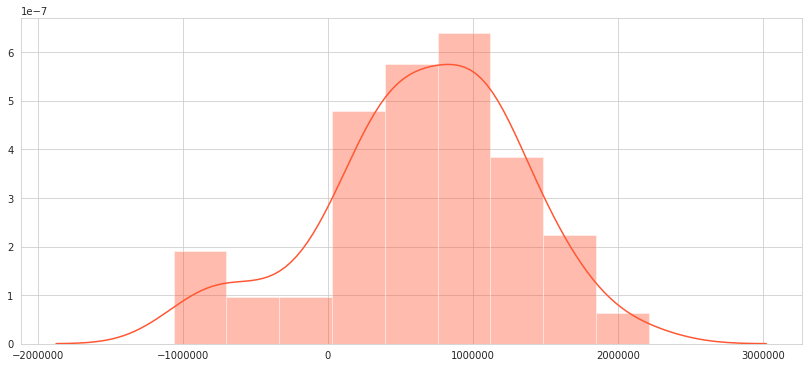

In [6]:
#plot the distribution
ax=sns.distplot(df, color='#FF5733')

In [7]:
import sklearn.preprocessing as preproc
import statsmodels.api as sm

#### Transform

In [8]:
x = df[['Revenue']]

In [9]:
pt = preproc.PowerTransformer(method='yeo-johnson')
pt.fit(x)
df['revenue_transformed'] = pt.fit_transform(x)

[]

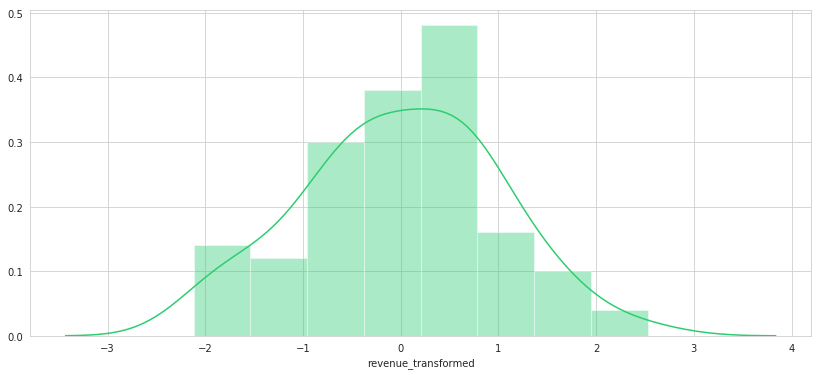

In [10]:
#plot the distribution
sns.distplot(df.revenue_transformed, color='#2ecc71').plot()

#### Stationarity

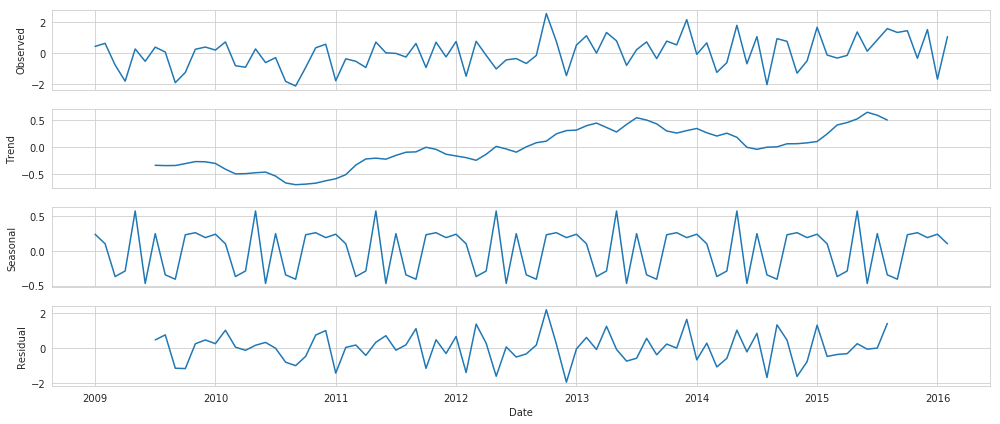

In [11]:
# Use decoposition to check for trend and seasonality
decomposition = sm.tsa.seasonal_decompose(df['revenue_transformed'], model='additive')
fig = decomposition.plot()
plt.show()

#### De-Trend

In [12]:
df['dtrend'] = df.revenue_transformed.diff(periods=1)

In [13]:
df[:5]

,Revenue,revenue_transformed,dtrend
Date,,,
2009-01-01,"943,690",0,nan
2009-02-01,"1,062,565",1,0
2009-03-01,"210,079",-1,-1
2009-04-01,"-735,286",-2,-1
2009-05-01,"842,933",0,2


- Using differencing with create missing values on the start period, we impute the missing using the back-fill.

In [14]:
# The term bfill means that we use the value before filling in missing values
df['dtrend']= df['dtrend'].fillna(df.dtrend.bfill())
df[:5]

,Revenue,revenue_transformed,dtrend
Date,,,
2009-01-01,"943,690",0,0
2009-02-01,"1,062,565",1,0
2009-03-01,"210,079",-1,-1
2009-04-01,"-735,286",-2,-1
2009-05-01,"842,933",0,2


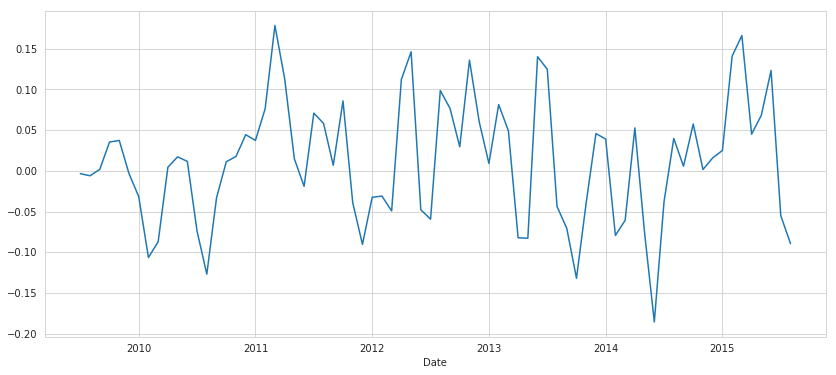

In [15]:
# Use decoposition to check for trend and seasonality
decomposition1 = sm.tsa.seasonal_decompose(df['dtrend'], model='additive')
fig = decomposition1.trend.plot()
plt.show()

---

### Moving Average

For each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.


In [16]:
#splitting into train and validation
# train is data from feb 2009 up to the 1st-half of 2015
# Validation is data from July of 2015 and 2 months of 2016
train = df[['dtrend']][:77]
valid = df[['dtrend']][77:]

In [17]:
df['dtrend'].shape, train.shape, valid.shape

((86,), (77, 1), (9, 1))

#### Predictions

In [18]:
#make predictions using moving averages
preds = []
for i in range(0,(valid.shape[0])):
    a = train['dtrend'][len(train)-valid.shape[0]+i:].sum() + sum(preds)
    b = a/(valid.shape[0])
    preds.append(b)

#### Results

In [19]:
#calculate rmse
rms = np.sqrt(np.mean(np.power((np.array(valid['dtrend'])-preds),2)))
rms

1.7519082097729946

> RMSE does not help us understand how the model performed. Let’s visualize through a plot to get a more intuitive understanding. 

> So here is a plot of the predicted values along with the transformed values.

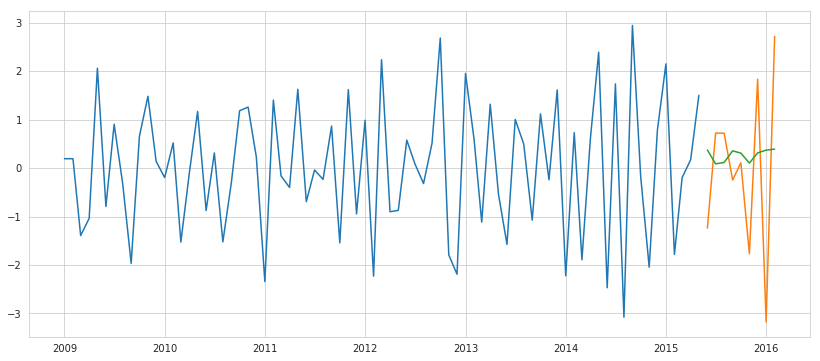

In [20]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['dtrend'])
plt.plot(valid[['dtrend', 'Predictions']])
plt.show()